Shape of the dataset is  (3168, 21) 

   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  lab

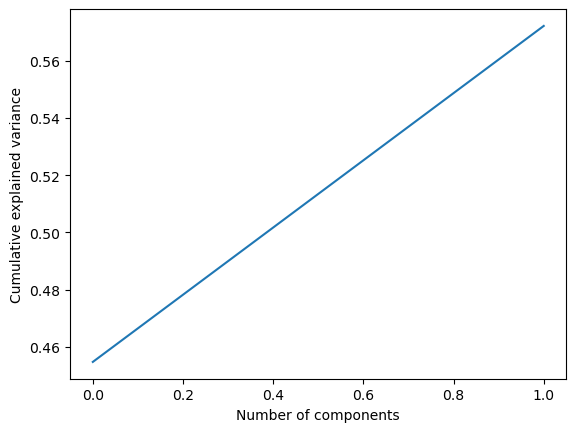

Confusion Matrix 
 [[236  61]
 [ 72 265]] 

Accuracy is  0.7902208201892744 

Precision is 0.7895586009082942 

Recall is  0.7904814714903736 



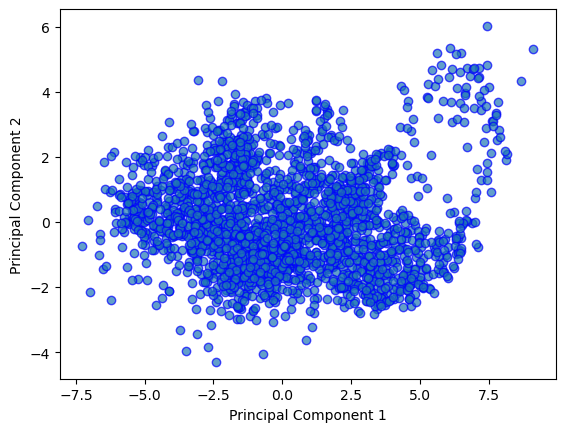

In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score



def main():
    # Read the dataset
    df = pd.read_csv('voice.csv')

    # Check the shape of the dataset
    print("Shape of the dataset is ",df.shape, "\n")

    # Print the first 5 rows of the dataset
    print(df.head(), "\n")

    # Check the presence of missing values. Handle it if present 
    print(df.isnull().sum(), '\n')
    
    #df.drop_duplicates(inplace=True)


    # Selecting the feature i.e., Identify the Independent variables and perform the extraction. 
    X = df.drop(['label'], axis=1)
    y = df['label']

    # Split the dataset into training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    
    # Standardize the dataset
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    # Apply PCA with 0.95 variance
    pca = PCA(n_components=2)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of components')
    plt.ylabel('Cumulative explained variance')
    plt.show()
    
    # Apply Decision Tree and print the accuracy
    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    print("Confusion Matrix", "\n", confusion_matrix(y_test, y_pred), "\n")
    print("Accuracy is ",accuracy_score(y_test, y_pred), "\n")
    print("Precision is",precision_score(y_test, y_pred, average='macro'), "\n")
    print("Recall is ",recall_score(y_test, y_pred, average='macro'), "\n")
    
    plt.scatter(X_train[:, 0], X_train[:, 1],cmap='rainbow', alpha=0.7, edgecolors='b')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

main()

In [2]:
def withoutPca():
    # Read the dataset
    df = pd.read_csv('voice.csv')

    # Check the shape of the dataset
    print(df.shape)

    # Print the first 5 rows of the dataset
    print(df.head())

    # Check the presence of missing values. Handle it if present 
    print(df.isnull().sum())

    # remove duplicates
    df.drop_duplicates(inplace=True)
    

    # Selecting the feature i.e., Identify the Independent variables and perform the extraction. 
    X = df.drop(['label'], axis=1)
    y = df['label']

    # Split the dataset into training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    # Standardize the dataset
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Apply Decision Tree and print the accuracy
    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    print("Confusion Matrix", "\n", confusion_matrix(y_test, y_pred), "\n")

    print("Accuracy is ",accuracy_score(y_test, y_pred), "\n")
    # also calculate the percison and recall
    print("Precision is",precision_score(y_test, y_pred, average='macro'), "\n")
    print("Recall is ",recall_score(y_test, y_pred, average='macro'), "\n")


In [3]:
withoutPca()

(3168, 21)
   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812 